# Praktikum Informationstechnik im Maschinenbau II
## P05 - Funktionsverlauf plotten mit `numpy` und `matplotlib`

## Aufgabe 1: Grafische Darstellung der Abklingfunktion

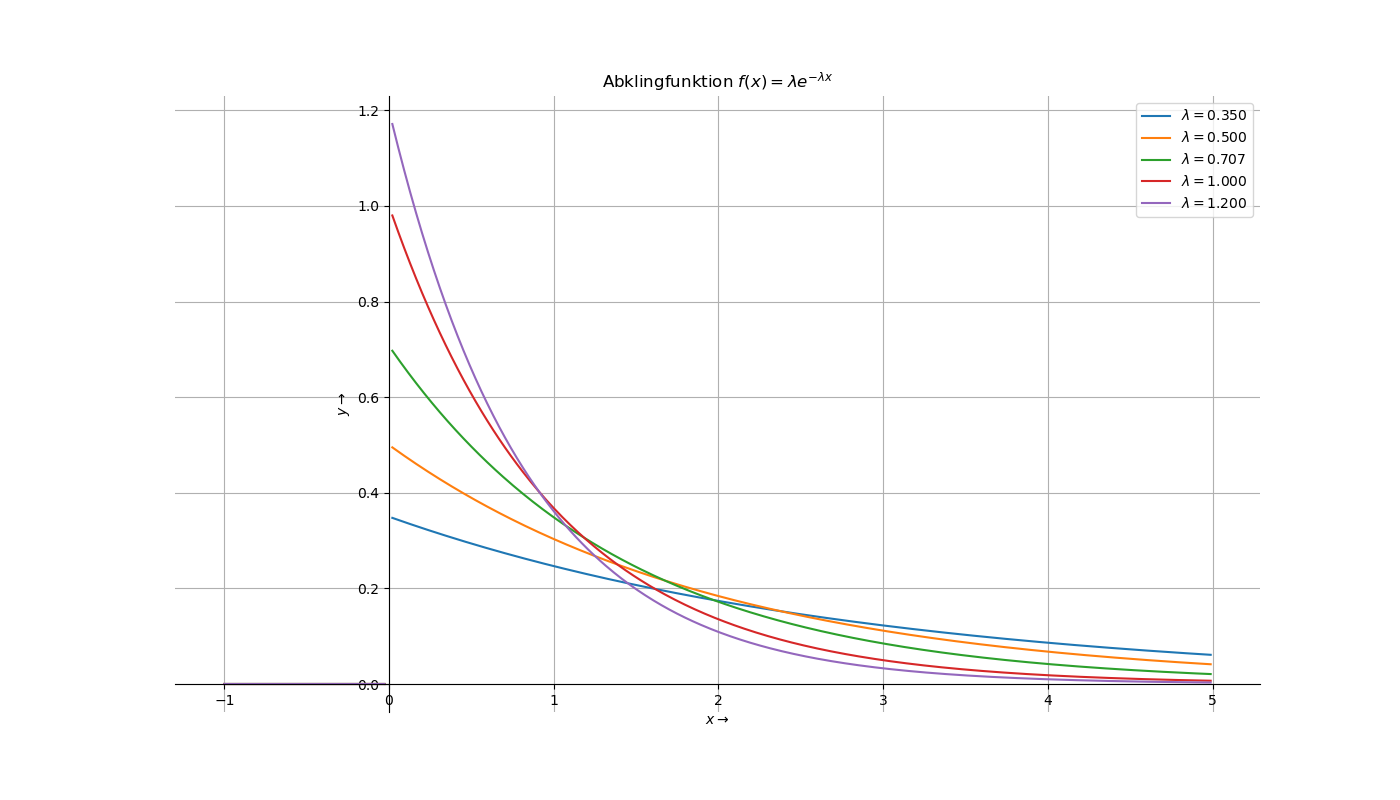

### a) Wertetabelle der Abklingfunktion
Berechnen Sie 
$$
f(x) = \begin{cases}
0 & \text{für }  x < 0\\
\lambda e^{-\lambda x} & \text{für }  x \ge 0
\end{cases}
$$
mit zunächst $\lambda=\frac{1}{\sqrt{2}}$ für 500 äquidistante Stützstellen im Intervall $\{x \in \mathbb{R} | -1 \le x < 5\}$.

- Erzeugen Sie die Stützstellen mit `numpy.arange()` oder `numpy.linspace()`
- Für die Fallunterscheidung ($x < 0$) nutzen Sie ein boole'sches Array
- Geben Sie jeden 20. Wert als Wertetabelle mit einer Genauigkeit von 4 Nachkommastellen aus

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# X-Werte erzeugen
X = np.linspace(-1, 5, 500, endpoint=False)

In [3]:
#oder
X = np.arange(-1, 5, 6/500)

In [4]:
# Ausrechnen der Funktionswerte
# Lambda 
lbd = 1/(2**0.5)

# Funktion auswerten
Y = lbd * np.exp(-lbd*X)

# Zu Null setzen für x < 0
Y[X<0]=0

In [5]:
# Print-Option für Nachkommastellen setzen
np.set_printoptions(precision=4)
# Wertetabelle ausgeben, jeden 20. Wert
print(np.column_stack((X[::20], Y[::20])))

[[-1.      0.    ]
 [-0.76    0.    ]
 [-0.52    0.    ]
 [-0.28    0.    ]
 [-0.04    0.    ]
 [ 0.2     0.6139]
 [ 0.44    0.518 ]
 [ 0.68    0.4372]
 [ 0.92    0.3689]
 [ 1.16    0.3114]
 [ 1.4     0.2628]
 [ 1.64    0.2217]
 [ 1.88    0.1871]
 [ 2.12    0.1579]
 [ 2.36    0.1333]
 [ 2.6     0.1125]
 [ 2.84    0.0949]
 [ 3.08    0.0801]
 [ 3.32    0.0676]
 [ 3.56    0.057 ]
 [ 3.8     0.0481]
 [ 4.04    0.0406]
 [ 4.28    0.0343]
 [ 4.52    0.0289]
 [ 4.76    0.0244]]


### b) Einfache Grafik

- Zeichnen Sie den Verlauf in ein Achsenkreuz
- Blenden Sie ein Raster (`.grid()`) ein

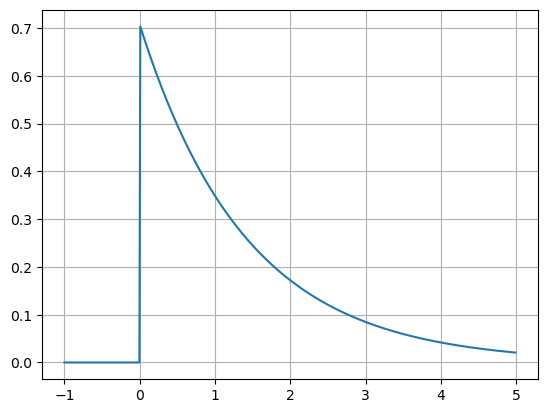

In [6]:
# Zeichnen
plt.plot(X, Y)
# Raster
plt.grid(True)

### c) Funktion für die Berechnung mit beliebigem $\lambda$

- Definieren Sie eine Funktion `def expo(...):` 
- $\lambda$ soll als `named`-Parameter angegeben werden können. Ohne Angabe soll $\lambda=0.5$ gelten
- In der Umgebung der Unstetigkeitsstelle ($-0.02 < x < 0.02$) sollen die Funktionswerte auf `np.nan`gesetzt werden, um die vertikale Linie zu vermeiden
    >Tipp: Eine "und"-Verknüpfung mehrerer boole'sche Arrays geht mit `np.logical_and()`

In [10]:
# Definition der Funktion
def expo(X, lbd=0.5):
    Y = lbd * np.exp(-lbd*X)
    Y[X<0]=0
    Y[np.logical_and(X > -0.02, X < 0.02)] = np.nan
    return Y
Y

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.7031, 0.6972, 0.6913, 0.6854,
       0.6797, 0.6739, 0.6682, 0.6626, 0.657 , 0.6514, 0.6459, 0.6405,
       0.635 , 0.6297, 0.6244, 0.6191, 0.6139, 0.6087, 0.6035, 0.5984,
       0.5934, 0.5884, 0.5834, 0.5785, 0.5736, 0.5687, 0.5639, 0.5592,
      

### d) Verfeinerte Grafik


Erstellen Sie eine "druckfertige" Grafik. 

- Erzeugen Sie mit  `fig, ax = plt.subplots(figsize=(14,8))` ein "figure" und ein Achsenkreuz. (`figsize=(14,8)` stellt die Bildgröße ein)
- Schreiben Sie mit `ax.set_title()` die Überschrift: Abklingfunktion $f(x) = \lambda e^{-\lambda x}$ als \LaTex-String
>Tipp: Um in einem Python String einen Backslash (\\) zu schreiben, müssen Sie ihn entweder verdoppeln (\\\\) oder den String als "raw" kennzeichnen `r'Textstring'`

- Berechnen Sie die Verläufe für verschiedene  $\lambda \in \{0.2, 0.5, \frac{1}{\sqrt{2}}, 1.0, 1.2\}$
- Zeichnen Sie die Verläufe mit `ax.plot()` in verschiedenen Farben ein
- x-Achsenbeschriftung $x \rightarrow$ (`ax.set_xlabel()`)
- y-Achsenbeschriftung $y \rightarrow$
- Achsenkreuz durch Nullpunkt (Modifikationen an `ax.spines`)
- Legende in der Form $\lambda=n.nnn$

>Hinweis: Hier wird die objetorientierte Vorgehensweise gewählt, in der z.B. eine Überschrift  mit `ax.set_title()` gesetzt wird. Man kann auch Matlab-artig `plt.title()` benutzen. Gerade für komplexere Gestaltungsaufgaben ist die objektorientierte Arbeitsweise vorzuziehen, weil sie flexibler ist.

Speichern Sie die fertige Grafik als png-Datei unter dem Namen `abkling.png`

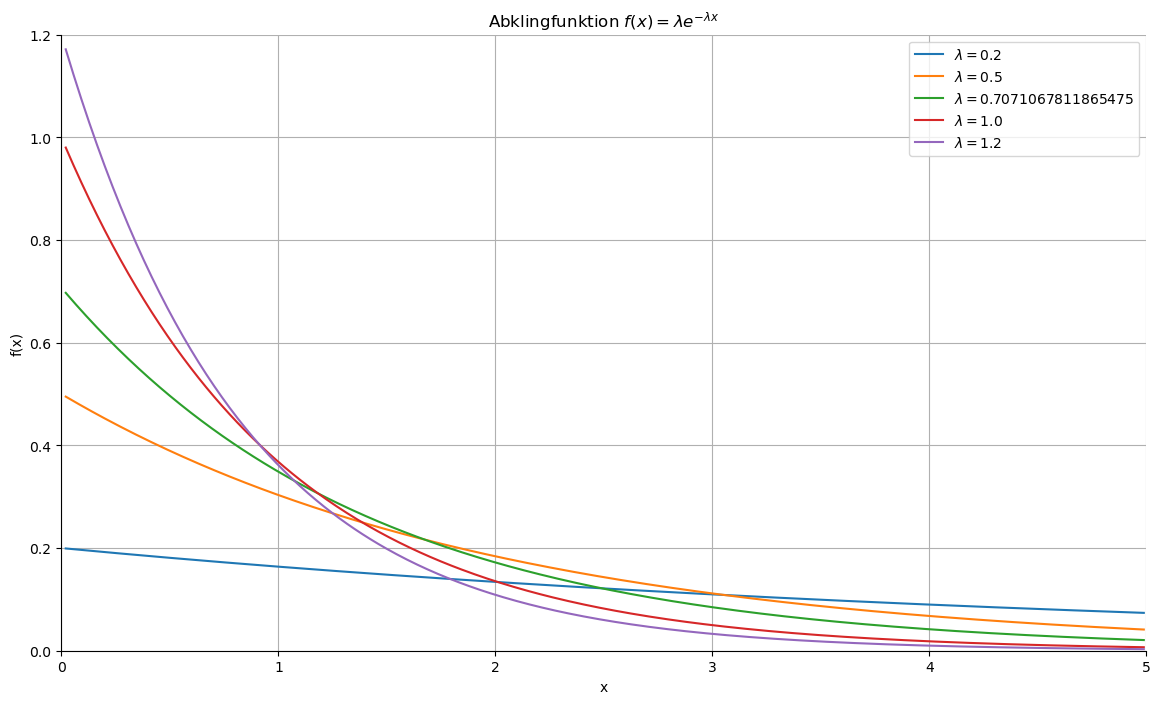

In [18]:
# Figure und Achsenkreuz erzeugen
fig, ax = plt.subplots(figsize=(14,8))

# Titel, x- und y-Labels setzen
ax.set_title(r'Abklingfunktion $f(x) = \lambda e^{-\lambda x}$')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

# Verläufe einzeichnen
for lbd in [0.2, 0.5, 1/2**0.5, 1.0, 1.2]:
    Y = expo(X, lbd)
    ax.plot(X, Y, label=f'$\lambda = {lbd}$')
    

# Linke und Untere Rahmenlinien in Nullpunkt legen
plt.xlim([0, 5])
plt.ylim([0, 1.2])

# Rechte und obere Rahmenlinien unsichtbar schalten
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Legende einzeichnen
ax.legend()

# Raster (Grid) einblenden
ax.grid()
plt.show()


In [47]:
# Bild speichern
